# HACKATHON

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
       
       
**Best number of clicks: 97.0
Best base bid: 101720.344069**

# SETUP

In [1]:
import time
beginning_time = time.time()

import sys
sys.path.append("../Code/")
from utils import new_performance

import os
DATA_DIR = os.path.join('..', 'Data')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
def timtime(t):
    print(">",int(time.time()- t), "seconds elapsed")

# LOAD DATA

In [3]:
# sparse might be important?

develop = False
        
train_X = pd.concat([pd.read_pickle(os.path.join(DATA_DIR, 'train_X_1')), 
                     pd.read_pickle(os.path.join(DATA_DIR, 'train_X_2'))])
train_y = pd.read_pickle(os.path.join(DATA_DIR, 'train_y'))
valid_X = pd.read_pickle(os.path.join(DATA_DIR, 'valid_X'))
valid_y = pd.read_pickle(os.path.join(DATA_DIR, 'valid_y'))

if develop:
    train_X = train_X[0:10000]
    train_y = train_y[0:10000]
    valid_X = valid_X[0:1000]
    valid_y = valid_y[0:1000]

In [4]:
from scipy.sparse import csr_matrix
train_X = csr_matrix(train_X) 
valid_X = csr_matrix(valid_X)

# CTR Classifier

In [35]:
#### IMPORT CTR PREDICTOR
import pickle
pkl_filename = "../Models/clf3.pkl"  
with open(pkl_filename, 'rb') as file:  
    CTR_model = pickle.load(file)

### Linear bidding

In [36]:
valid_ctr_pred = CTR_model.predict_proba(valid_X)

In [37]:
np.shape(valid_ctr_pred[:,1])

(303925,)

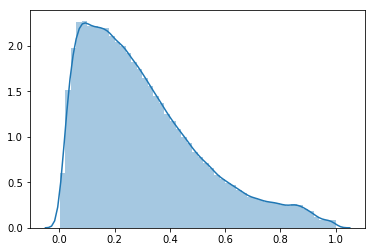

In [38]:
sns.distplot(valid_ctr_pred[:,1])
plt.show()

In [23]:
np.max(valid_ctr_pred[:,1])

0.9999624770437181

In [24]:
np.min(valid_ctr_pred[:,1])

0.00048305838338777522

In [25]:
np.median(valid_ctr_pred[:,1])

0.25467921162593687

In [26]:
np.mean(valid_ctr_pred[:,1])

0.30190591803152578

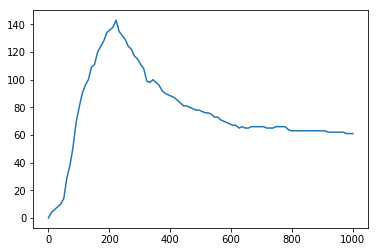

Best number of clicks: 143.0
Best base bid: 222.222222222


In [47]:
min_base_bid = 0
max_base_bid = 1e3
n_base_bids = 100

base_bid = np.linspace(min_base_bid, max_base_bid, n_base_bids)
clicks = np.zeros_like(base_bid)

for i, bb in zip(range(n_base_bids), base_bid):
    bids = bb*valid_ctr_pred[:,1]
    _, c, __, ___, ____, _____, ______ = new_performance(bids, valid_y, verbose=False)
    clicks[i] = c
    
#### plot ####
plt.plot(base_bid, clicks)
plt.show()

# best result
print("Best number of clicks:", np.max(clicks))
print("Best base bid:", base_bid[np.argmax(clicks)])

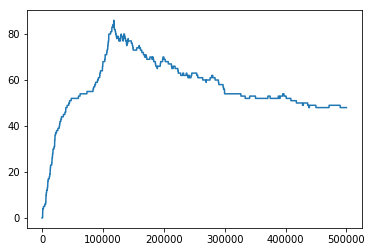

Best number of clicks: 86.0
Best base bid: 117823.564713


In [8]:
#### plot ####
plt.plot(base_bid, clicks)
plt.show()

# best result
print("Best number of clicks:", np.max(clicks))
print("Best base bid:", base_bid[np.argmax(clicks)])

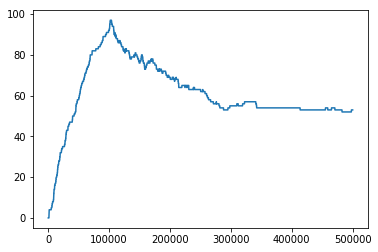

Best number of clicks: 97.0
Best base bid: 101720.344069


In [14]:
#### plot ####
plt.plot(base_bid, clicks)
plt.show()

# best result
print("Best number of clicks:", np.max(clicks))
print("Best base bid:", base_bid[np.argmax(clicks)])

Analysis

In [10]:
best_base = base_bid[np.argmax(clicks)]
my_bids = best_base*valid_ctr_pred[:,1]

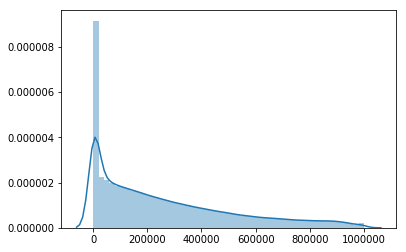

In [11]:
sns.distplot(my_bids)
plt.show()

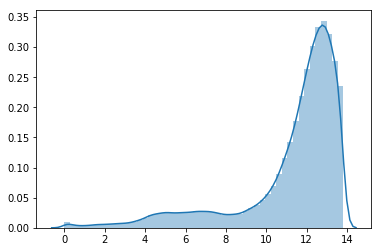

In [12]:
sns.distplot(np.log1p(my_bids))
plt.show()

In [13]:
np.min(my_bids)

2.5259385936216184e-07

In [14]:
np.max(my_bids)

1000999.2315365589

In [15]:
np.median(my_bids)

191549.92757360052

In [16]:
np.mean(my_bids)

264975.17078148108

In [17]:
x = new_performance(best_base*valid_ctr_pred[:,1], valid_y)

               CTR: (0.0640)%
        num_clicks: 49
             spend: 6249802 (100.00)%
              aCPM: 79.3817174937
              aCPC: 127.546979592
num_in_budget_wins: 76503
 ads_within_budget: 78731


# PRINTED "BEST BASE BID" above is wrong

### Run on test set

In [ ]:
submission = pd.read_csv('../Data/Group_01.csv')

In [ ]:
submission.head()

In [ ]:
test_predictions = int(base_bid[np.argmax(clicks)])*CTR_model.predict(test_X)

In [ ]:
submission.bidprice = test_predictions

In [ ]:
submission.head()

In [ ]:
submission.to_csv('../Group_01.csv')

In [40]:
pkl_filename = "../Models/tim_xgb_click.pkl"  
with open(pkl_filename, 'rb') as file:  
    CTR_model_2 = pickle.load(file)

In [41]:
valid_ctr_pred_2 = CTR_model_2.predict(valid_X)

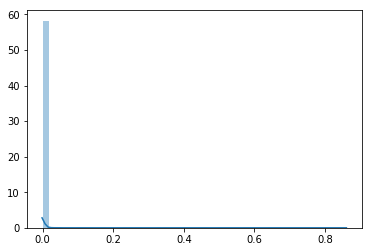

In [42]:
sns.distplot(valid_ctr_pred_2)
plt.show()

In [34]:
print("   max:", np.max(valid_ctr_pred))
print("   min:", np.min(valid_ctr_pred))
print("  mean:", np.mean(valid_ctr_pred))
print("median:", np.median(valid_ctr_pred))

   max: 0.858101
   min: 0.000583426
  mean: 0.00119988
median: 0.000872972


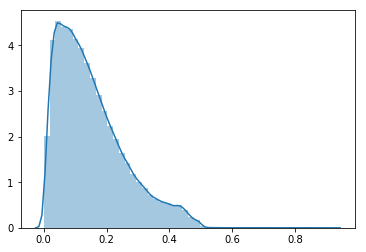

In [45]:
sns.distplot(0.5*(valid_ctr_pred[:,1]+valid_ctr_pred_2))
plt.show()

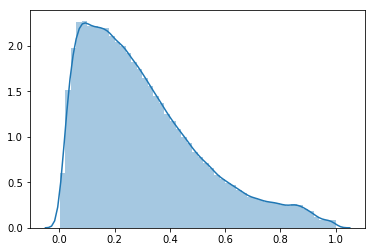

In [38]:
sns.distplot(valid_ctr_pred[:,1])
plt.show()

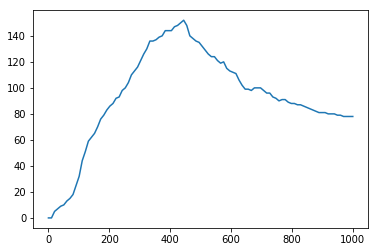

Best number of clicks: 152.0
Best base bid: 444.444444444


In [49]:
ensemble_ctr = 0.5*valid_ctr_pred[:,1]+0.5valid_ctr_pred_2

min_base_bid = 0
max_base_bid = 1e3
n_base_bids = 100

base_bid = np.linspace(min_base_bid, max_base_bid, n_base_bids)
clicks = np.zeros_like(base_bid)

for i, bb in zip(range(n_base_bids), base_bid):
    bids = bb*ensemble_ctr
    _, c, __, ___, ____, _____, ______ = new_performance(bids, valid_y, verbose=False)
    clicks[i] = c
    
#### plot ####
plt.plot(base_bid, clicks)
plt.show()

# best result
print("Best number of clicks:", np.max(clicks))
print("Best base bid:", base_bid[np.argmax(clicks)])

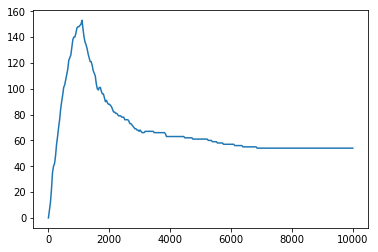

Best number of clicks: 153.0
Best base bid: 1103.67892977


In [52]:
ensemble_ctr = 0.2*valid_ctr_pred[:,1]+0.8*valid_ctr_pred_2

min_base_bid = 0
max_base_bid = 1e4
n_base_bids = 300

base_bid = np.linspace(min_base_bid, max_base_bid, n_base_bids)
clicks = np.zeros_like(base_bid)

for i, bb in zip(range(n_base_bids), base_bid):
    bids = bb*ensemble_ctr
    _, c, __, ___, ____, _____, ______ = new_performance(bids, valid_y, verbose=False)
    clicks[i] = c
    
#### plot ####
plt.plot(base_bid, clicks)
plt.show()

# best result
print("Best number of clicks:", np.max(clicks))
print("Best base bid:", base_bid[np.argmax(clicks)])

In [57]:
np.sum(1000*valid_ctr_pred_2>valid_ctr_pred[:,1])

300430